## TASK 3: Kmeans Clustering(unsupervised machine learning)

K Means Clustering is an unsupervised learning algorithm that tries to cluster data based on their similarity. Unsupervised learning means that there is no outcome to be predicted, and the algorithm just tries to find patterns in the data. In k means clustering, we have the specify the number of clusters we want the data to be grouped into. The algorithm randomly assigns each observation to a cluster, and finds the centroid of each cluster. Then, the algorithm iterates through two steps: Reassign data points to the cluster whose centroid is closest. Calculate new centroid of each cluster. These two steps are repeated till the within cluster variation cannot be reduced any further. The within cluster variation is calculated as the sum of the euclidean distance between the data points and their respective cluster centroids.

### Importing few libraries

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Importing the iris dataset

In [34]:
iris=pd.read_csv('iris.csv')

In [35]:
iris.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


Let's name the columns of the dataset first.

In [36]:
iris=pd.read_csv('iris.csv',names=['sepal_length','sepal_width','petal_length','petal_width','species'])
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Exploring the dataset

In [37]:
iris.shape # shows the dimension of the dataset

(150, 5)

In [38]:
iris.describe() #this provides a statistics about the data

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [39]:
iris.nunique() # This shows the number of unique values in each column.

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
species          3
dtype: int64

In [40]:
iris['species'].unique() #This shows the name of unique values in the species column.

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### Are there any missing values? Let's check!

In [41]:
iris.info() #method1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [42]:
iris.isnull().any() #method2

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
species         False
dtype: bool

There are no missing values.

### Feature Engineering

In [43]:
iris['sepal_area']=iris['sepal_length']*iris['sepal_width']
iris['petal_area']=iris['petal_length']*iris['petal_width']

In [44]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_area,petal_area
0,5.1,3.5,1.4,0.2,Iris-setosa,17.85,0.28
1,4.9,3.0,1.4,0.2,Iris-setosa,14.70,0.28
2,4.7,3.2,1.3,0.2,Iris-setosa,15.04,0.26
3,4.6,3.1,1.5,0.2,Iris-setosa,14.26,0.30
4,5.0,3.6,1.4,0.2,Iris-setosa,18.00,0.28


### Converting categorical columns to numerical columns

In [45]:
iris['species']=iris['species'].map({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})

In [46]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_area,petal_area
0,5.1,3.5,1.4,0.2,0,17.85,0.28
1,4.9,3.0,1.4,0.2,0,14.70,0.28
2,4.7,3.2,1.3,0.2,0,15.04,0.26
3,4.6,3.1,1.5,0.2,0,14.26,0.30
4,5.0,3.6,1.4,0.2,0,18.00,0.28


### Data Visualisation

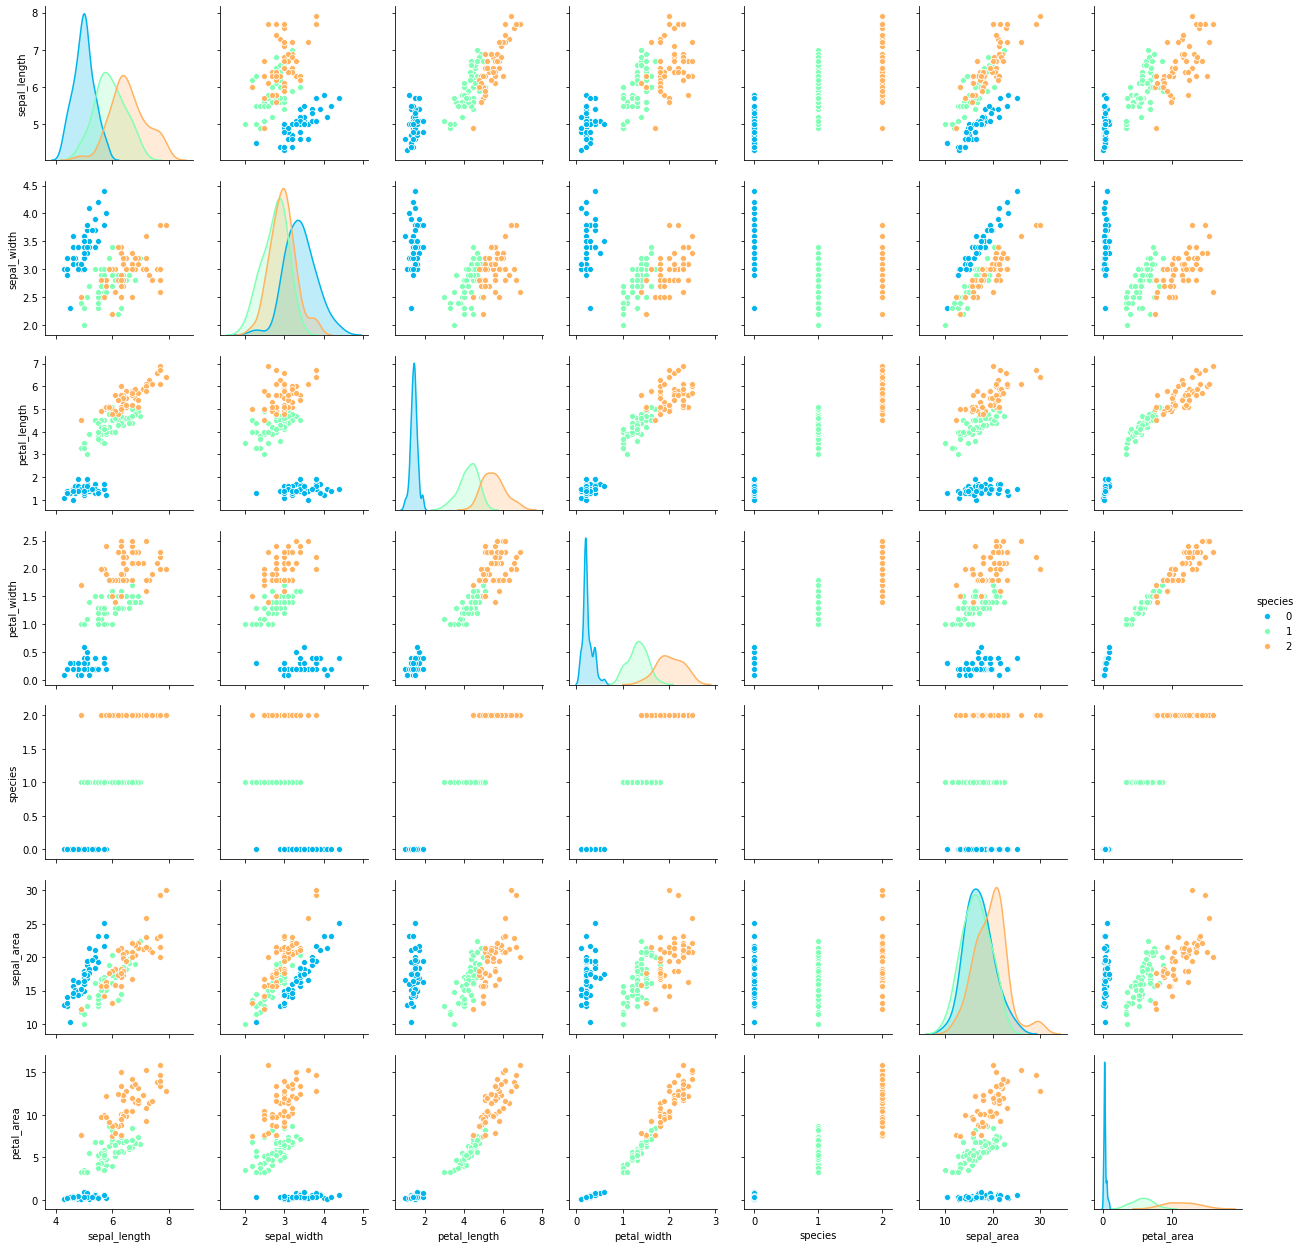

In [47]:
sns.pairplot(data=iris,hue='species',palette='rainbow')

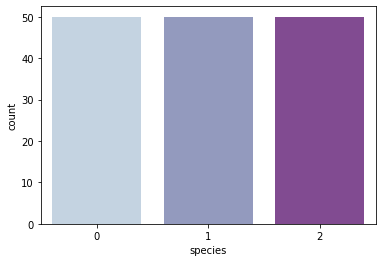

In [48]:
sns.countplot(iris['species'],palette='BuPu')

### Separating the target and features in order to train the model

In [49]:
X=iris.drop('species',axis=1)

### Kmeans Cluster Creation

In [50]:
from sklearn.cluster import KMeans

In [51]:
kmeans=KMeans(n_clusters=3)
#Here,it is already given that the target variable has three categories.Therefore,optimal number of clusters=3

In [52]:
kmeans.fit(X) #Unsupervised ML model learns only from the features since the actual target variable values are unknown.

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [53]:
kmeans.cluster_centers_

array([[ 6.84736842,  3.11315789,  5.68421053,  2.07894737, 21.33052632,
        11.86394737],
       [ 5.006     ,  3.418     ,  1.464     ,  0.244     , 17.2088    ,
         0.3628    ],
       [ 5.90322581,  2.72419355,  4.42903226,  1.42903226, 16.12870968,
         6.4516129 ]])

In [54]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0,
       0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [69]:
centroids=pd.DataFrame(kmeans.cluster_centers_,columns=['X1','X2','X3','X4','X5','X6'])

### Graphical visualisation of clusters in kmeans versus original clusters

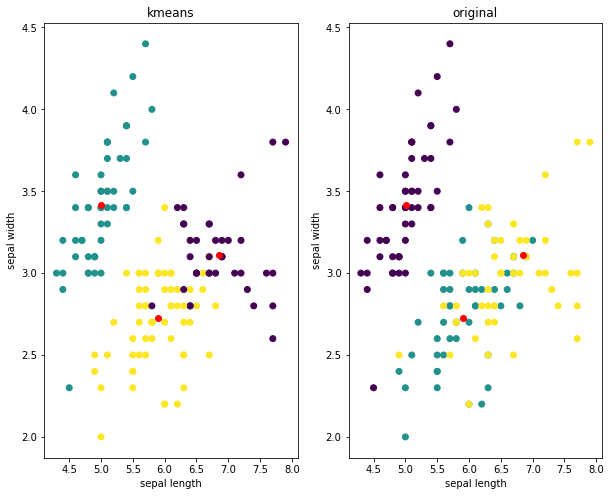

In [81]:
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
plt.scatter(iris.iloc[:,0],iris.iloc[:,1],c=kmeans.labels_)
plt.title('kmeans')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='red')

plt.subplot(1,2,2)
plt.scatter(iris.iloc[:,0],iris.iloc[:,1],c=iris.species)
plt.title('original')
plt.xlabel('sepal length')
plt.ylabel('sepal width')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='red')

### Evaluation of the model
Unsupervised ML models cannot be evaluated due to lack of availability of actual labels but here in this case actual label values are available. So,let's evaluate the model!

In [22]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [23]:
print(classification_report(iris['species'],kmeans.labels_))
print('\n')
print(confusion_matrix(iris['species'],kmeans.labels_))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.11      0.08      0.09        50
           2       0.26      0.32      0.29        50

    accuracy                           0.47       150
   macro avg       0.45      0.47      0.46       150
weighted avg       0.45      0.47      0.46       150



[[50  0  0]
 [ 0  4 46]
 [ 0 34 16]]
